DATA FACTS AND IMPORT

In [20]:
import nltk
import pandas as pd
from nltk import FreqDist
import seaborn as sns
nltk.download('stopwords')
import openai
Reviewdata=pd.read_csv('train.csv')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
Reviewdata.shape

(38932, 5)

In [22]:
Reviewdata.head(20)

,User_ID,Description,Browser_Used,Device_Used,Is_Response
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy
5,id10331,We had - rooms. One was very nice and clearly ...,InternetExplorer,Desktop,happy
6,id10332,My husband and I have stayed in this hotel a f...,Firefox,Tablet,not happy
7,id10333,My wife & I stayed in this glorious city a whi...,Google Chrome,Mobile,happy
8,id10334,My boyfriend and I stayed at the Fairmont on a...,Internet Explorer,Desktop,happy
9,id10335,"Wonderful staff, great location, but it was de...",Chrome,Tablet,not happy


In [23]:
Reviewdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38932 entries, 0 to 38931
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User_ID       38932 non-null  object
 1   Description   38932 non-null  object
 2   Browser_Used  38932 non-null  object
 3   Device_Used   38932 non-null  object
 4   Is_Response   38932 non-null  object
dtypes: object(5)
memory usage: 1.5+ MB


In [24]:
Reviewdata.describe().transpose()

,count,unique,top,freq
User_ID,38932,38932,id21408,1
Description,38932,38932,"From check in to the great breakfast, it was a...",1
Browser_Used,38932,11,Firefox,7367
Device_Used,38932,3,Desktop,15026
Is_Response,38932,2,happy,26521


In [25]:
count=Reviewdata.isnull().sum().sort_values(ascending=False)
percentage= ((Reviewdata.isnull().sum()/len(Reviewdata)*100)).sort_values(ascending=False)
missing_data= pd.concat([count,percentage],axis=1,keys=['Count','Percentage'])
print('Count and percentage of missing values for columns : ')
missing_data

Count and percentage of missing values for columns : 


,Count,Percentage
User_ID,0,0.0
Description,0,0.0
Browser_Used,0,0.0
Device_Used,0,0.0
Is_Response,0,0.0


Percentage for default

happy        68.12
not happy    31.88
Name: Is_Response, dtype: float64


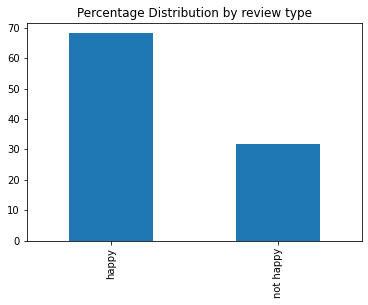

In [26]:
##Checking for disributuion
import matplotlib.pyplot as plt
%matplotlib inline
print('Percentage for default\n')
print(round(Reviewdata.Is_Response.value_counts(normalize=True)*100,2))
round(Reviewdata.Is_Response.value_counts(normalize=True)*100,2).plot(kind='bar')
plt.title('Percentage Distribution by review type')
plt.show()

In [27]:
Reviewdata.drop(columns=['User_ID', 'Browser_Used','Device_Used'],inplace=True)

In [28]:
import re
import string

def text_clean_1(text):
    text=text.lower()
    text=re.sub('\[.*?\]','',text)
    text=re.sub('[%s]' %re.escape(string.punctuation),'',text)
    text=re.sub('\w\d\w*','',text)
    return text
cleaned1=lambda x: text_clean_1(x)

In [29]:
Reviewdata['cleaned_description']=pd.DataFrame(Reviewdata.Description.apply(cleaned1))
Reviewdata.head(10)

,Description,Is_Response,cleaned_description
0,The room was kind of clean but had a VERY stro...,not happy,the room was kind of clean but had a very stro...
1,I stayed at the Crown Plaza April -- - April -...,not happy,i stayed at the crown plaza april april th...
2,I booked this hotel through Hotwire at the low...,not happy,i booked this hotel through hotwire at the low...
3,Stayed here with husband and sons on the way t...,happy,stayed here with husband and sons on the way t...
4,My girlfriends and I stayed here to celebrate ...,not happy,my girlfriends and i stayed here to celebrate ...
5,We had - rooms. One was very nice and clearly ...,happy,we had rooms one was very nice and clearly ha...
6,My husband and I have stayed in this hotel a f...,not happy,my husband and i have stayed in this hotel a f...
7,My wife & I stayed in this glorious city a whi...,happy,my wife i stayed in this glorious city a whil...
8,My boyfriend and I stayed at the Fairmont on a...,happy,my boyfriend and i stayed at the fairmont on a...
9,"Wonderful staff, great location, but it was de...",not happy,wonderful staff great location but it was defi...


In [30]:
def text_clean_2(text):
    text=re.sub('[''""...]','',text)
    text=re.sub('\n','',text)
    return text
cleaned2=lambda x: text_clean_2(x)

In [31]:
Reviewdata['cleaned_description_new']=pd.DataFrame(Reviewdata['cleaned_description'].apply(cleaned2))
Reviewdata.head(10)

,Description,Is_Response,cleaned_description,cleaned_description_new
0,The room was kind of clean but had a VERY stro...,not happy,the room was kind of clean but had a very stro...,the room was kind of clean but had a very stro...
1,I stayed at the Crown Plaza April -- - April -...,not happy,i stayed at the crown plaza april april th...,i stayed at the crown plaza april april th...
2,I booked this hotel through Hotwire at the low...,not happy,i booked this hotel through hotwire at the low...,i booked this hotel through hotwire at the low...
3,Stayed here with husband and sons on the way t...,happy,stayed here with husband and sons on the way t...,stayed here with husband and sons on the way t...
4,My girlfriends and I stayed here to celebrate ...,not happy,my girlfriends and i stayed here to celebrate ...,my girlfriends and i stayed here to celebrate ...
5,We had - rooms. One was very nice and clearly ...,happy,we had rooms one was very nice and clearly ha...,we had rooms one was very nice and clearly ha...
6,My husband and I have stayed in this hotel a f...,not happy,my husband and i have stayed in this hotel a f...,my husband and i have stayed in this hotel a f...
7,My wife & I stayed in this glorious city a whi...,happy,my wife i stayed in this glorious city a whil...,my wife i stayed in this glorious city a whil...
8,My boyfriend and I stayed at the Fairmont on a...,happy,my boyfriend and i stayed at the fairmont on a...,my boyfriend and i stayed at the fairmont on a...
9,"Wonderful staff, great location, but it was de...",not happy,wonderful staff great location but it was defi...,wonderful staff great location but it was defi...


Model Training

In [32]:
from sklearn.model_selection import train_test_split

Independent_var = Reviewdata.cleaned_description_new
Dependent_var=Reviewdata.Is_Response
IV_train, IV_test ,DV_train , DV_test =train_test_split(Independent_var,Dependent_var,test_size=0.1,random_state=225)

print('IV_train :',len(IV_train))
print('IV_test :',len(IV_test))
print('DV_train :',len(DV_train))
print('DV_test :',len(DV_test))


IV_train : 35038
IV_test : 3894
IV_train : 35038
IV_test : 3894


In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

tvec = TfidfVectorizer()
clf2 = LogisticRegression(solver = "lbfgs")

from sklearn.pipeline import Pipeline

In [34]:
model = Pipeline([('vectorizer',tvec),('classifier',clf2)])
model.fit(IV_train , DV_train)

from sklearn.metrics import confusion_matrix

predictions = model.predict(IV_test)

confusion_matrix(predictions, DV_test)



C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[2417,  304],
       [ 154, 1019]], dtype=int64)

In [35]:
from sklearn.metrics import accuracy_score , precision_score , recall_score

print("Accuracy :", accuracy_score(predictions ,DV_test))
print("Precision : ", precision_score(predictions,DV_test,average="weighted"))
print("Recall :",recall_score(predictions, DV_test , average="weighted"))

Accuracy : 0.8823831535695943
Precision :  0.8889271415963718
Recall : 0.8823831535695943


Trying new reviews

In [17]:
import pickle

In [37]:
with open('model_pickle','wb') as f:
    pickle.dump(model,f)

In [31]:
with open('model_pickle', 'rb') as f:
    np=pickle.load(f)

In [34]:
np.predict(['its a worst product'])  


array(['not happy'], dtype=object)

In [37]:
import joblib

In [39]:
joblib.dump(model,'model_joblib')


['model_joblib']

In [40]:
mj= joblib.load('model_joblib')

In [41]:
mj.predict(["its good"])

array(['happy'], dtype=object)